# ohlcv

In [1]:
import vectorbt as vbt

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from numba import njit, f8, i8, b1, optional

In [3]:
print(vbt.settings.ohlcv['column_names'])

{'open': 'Open', 'high': 'High', 'low': 'Low', 'close': 'Close', 'volume': 'Volume'}


In [4]:
try:
    pd.DataFrame([1, 2, 3]).vbt.ohlcv.plot()
except Exception as e:
    print(e) # couldn't find default column names

'Open'


In [5]:
ohlcv_ts = pd.DataFrame({
    'open': [1, 2, 3], 
    'high': [1, 2, 3], 
    'low': [1, 2, 3], 
    'close': [1, 2, 3], 
    'volume': [1, 2, 3]
})

In [6]:
ohlcv_ts = pd.DataFrame(
    columns=['open', 'high', 'low', 'close', 'volume'],
    index=[datetime(2018, 1, 1) + timedelta(days=i) for i in range(10)]
)
ohlcv_ts['open'] = np.cumsum(np.random.uniform(-0.8, 1, size=(10,)))
ohlcv_ts['close'] = ohlcv_ts['open'] + np.random.uniform(-1, 1, size=(10,))
ohlcv_ts['high'] = ohlcv_ts['open'] + np.random.uniform(0, 1, size=(10,))
ohlcv_ts['low'] = ohlcv_ts['open'] - np.random.uniform(0, 1, size=(10,))
ohlcv_ts['volume'] = np.cumsum(np.random.uniform(-1, 1, size=(10,)))

print(ohlcv_ts)

                open      high       low     close    volume
2018-01-01 -0.424153 -0.321744 -0.705846 -0.943088  0.535360
2018-01-02  0.075019  0.655929 -0.144308 -0.192102  0.142225
2018-01-03 -0.418223  0.570066 -1.398026 -0.540365 -0.558043
2018-01-04 -0.003115  0.240516 -0.935796  0.408863 -1.545320
2018-01-05  0.306214  0.623015 -0.442206  0.549050 -1.723522
2018-01-06 -0.287982  0.270174 -0.596416 -0.734239 -1.246353
2018-01-07 -0.247974  0.207725 -0.980995 -1.006446 -1.843342
2018-01-08  0.645696  1.061077 -0.166776  1.008188 -1.787340
2018-01-09  0.147886  1.086762 -0.800518 -0.103598 -2.161867
2018-01-10  1.100580  2.089444  0.785003  1.318252 -1.936682


In [7]:
try:
    ohlcv_ts.vbt.ohlcv.plot()
except Exception as e:
    print(e) # still couldn't find default column names

'Open'


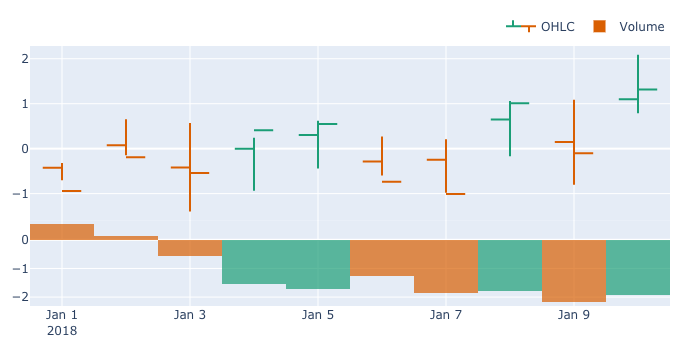

In [8]:
# Specify them manually
ohlcv_ts.vbt.ohlcv(column_names={
    'open': 'open', 
    'high': 'high', 
    'low': 'low', 
    'close': 'close', 
    'volume': 'volume'
}).plot().show_png()

In [9]:
# Or by changing the defaults
vbt.settings.ohlcv['column_names'] = {
    'open': 'open', 
    'high': 'high', 
    'low': 'low', 
    'close': 'close', 
    'volume': 'volume'
}

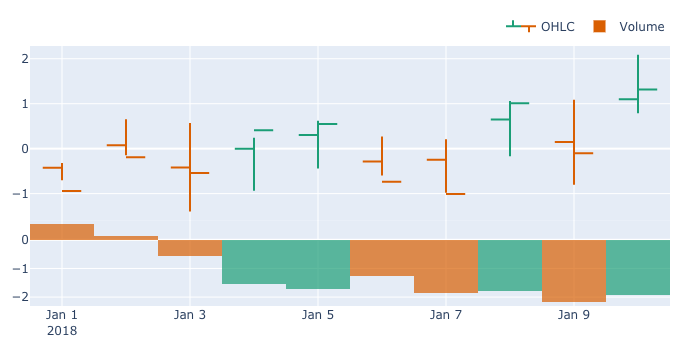

In [10]:
ohlcv_ts.vbt.ohlcv.plot().show_png()